In [104]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import time
import os
import psutil

st_Program_exTime = time.time()
st_CPU_exTime = time.process_time()
st_Perf_exTime = time.perf_counter()

In [105]:
def display(img, cmap='gray'):
    fig = plt.figure(figsize=(12, 10))
    ax =fig.add_subplot(111)
    ax.imshow(img, cmap='gray')

CPU times: total: 15.6 ms
Wall time: 9.79 ms


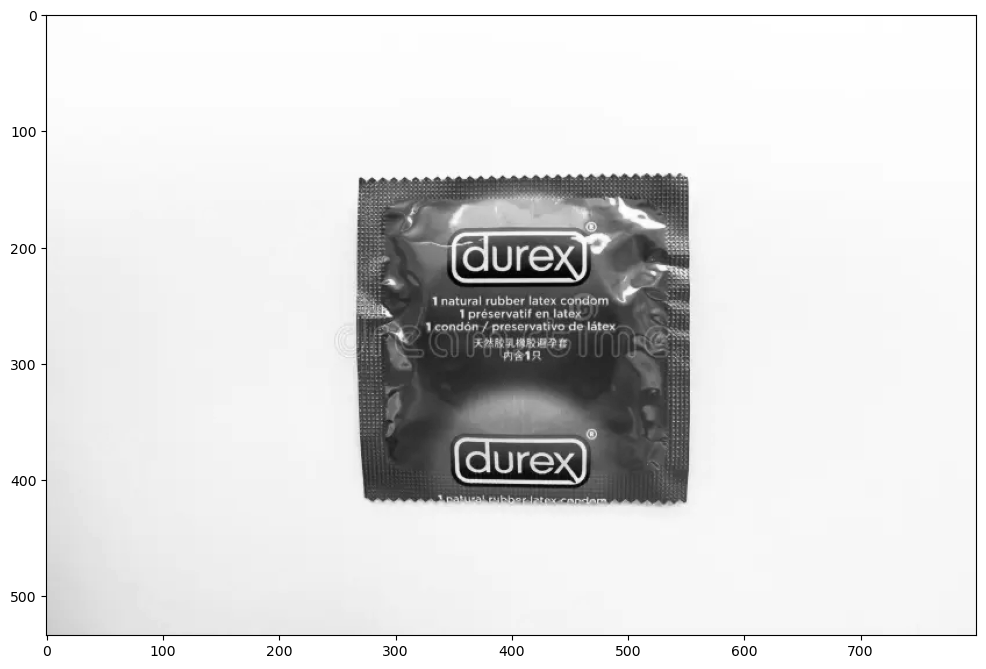

In [117]:
%%time
object = cv2.imread('img/durex.webp',0)
display(object)

CPU times: total: 15.6 ms
Wall time: 14.9 ms


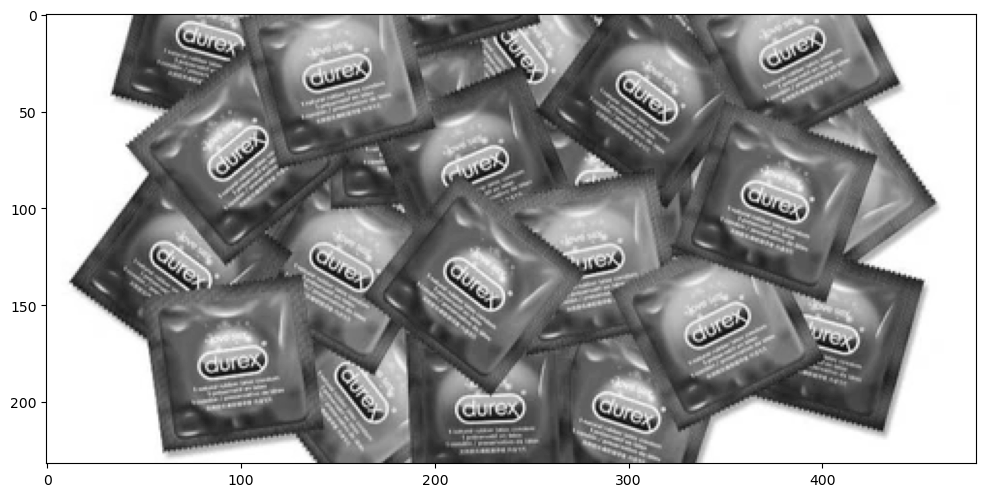

In [118]:
%%time
durex = cv2.imread('img/bulkdurex.webp',0)
display(durex)

In [108]:
# metode descriptor ORB
orb = cv2.ORB_create()

kp1, des1 = orb.detectAndCompute(object, None)
kp2, des2 = orb.detectAndCompute(durex, None)

# metode matching bruteforce
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match(des1, des2)

single_match = matches[0]
single_match.distance

70.0

CPU times: total: 15.6 ms
Wall time: 9.78 ms


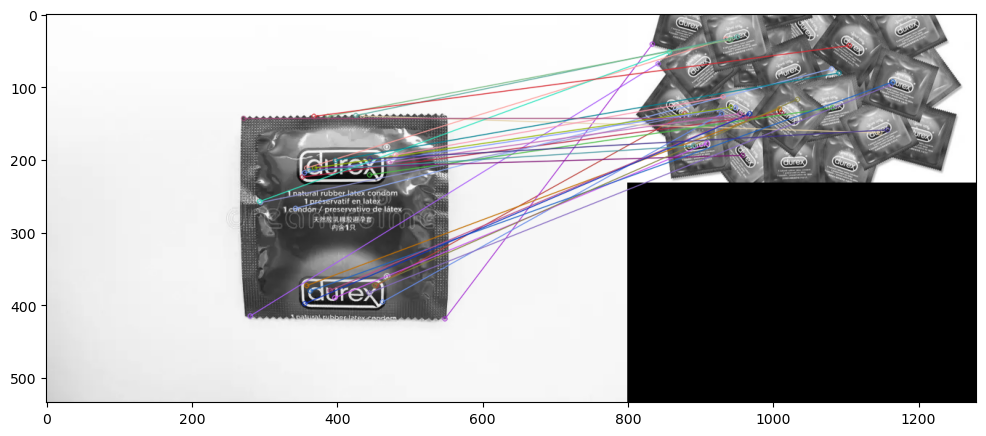

In [109]:
%%time
matches = sorted(matches, key=lambda x: x.distance)
object_matches = cv2.drawMatches(object, kp1, durex, kp2, matches[:30], None, flags=2)
display(object_matches)


In [ ]:
%%time
# create detector and detect
# descriptor SIFT
sift = cv2.xfeatures2d.SIFT_create()

CPU times: total: 93.8 ms
Wall time: 57.5 ms


In [111]:
%%time
kp1, des1 = sift.detectAndCompute(object, None)
kp2, des2 = sift.detectAndCompute(durex, None)

CPU times: total: 46.9 ms
Wall time: 50.5 ms


In [112]:
%%time
# metode matching bruteforce
bf = cv2.BFMatcher()
des1

CPU times: total: 0 ns
Wall time: 0 ns


array([[59.,  0.,  0., ...,  0.,  0.,  5.],
       [74., 26.,  5., ...,  0.,  0.,  1.],
       [26.,  2.,  5., ...,  0.,  0.,  0.],
       ...,
       [28.,  3.,  1., ...,  0.,  0.,  0.],
       [14., 33., 49., ...,  0.,  0.,  0.],
       [26., 16., 13., ...,  0.,  0.,  1.]], dtype=float32)

In [113]:
des2

array([[  0.,  53., 166., ...,   0.,   1.,   2.],
       [ 80.,  27.,   1., ...,   0.,   0.,   1.],
       [  6.,   1.,   2., ...,   0.,   0.,   1.],
       ...,
       [  0.,   0.,   4., ...,   0.,   0.,   1.],
       [  2.,   0.,   0., ...,   0.,   0.,   3.],
       [  0.,   0.,   0., ...,   0.,   0.,   8.]], dtype=float32)

In [115]:
matches = bf.knnMatch(des1, des2, k=2)
matches

((< cv2.DMatch 0000014DAF917D50>, < cv2.DMatch 0000014DAF917D90>),
 (< cv2.DMatch 0000014DAF914330>, < cv2.DMatch 0000014DAF9164D0>),
 (< cv2.DMatch 0000014DAF917AB0>, < cv2.DMatch 0000014DAF97AEF0>),
 (< cv2.DMatch 0000014DAF97AD90>, < cv2.DMatch 0000014DAF97B930>),
 (< cv2.DMatch 0000014DAF97B190>, < cv2.DMatch 0000014DAF97AE30>),
 (< cv2.DMatch 0000014DAF97A490>, < cv2.DMatch 0000014DAF97AB50>),
 (< cv2.DMatch 0000014DAF97B470>, < cv2.DMatch 0000014DAF979AB0>),
 (< cv2.DMatch 0000014DAF97B350>, < cv2.DMatch 0000014DAF978930>),
 (< cv2.DMatch 0000014DAF97B410>, < cv2.DMatch 0000014DAF97A4B0>),
 (< cv2.DMatch 0000014DAF97B490>, < cv2.DMatch 0000014DAF97B7F0>),
 (< cv2.DMatch 0000014DAF97A4D0>, < cv2.DMatch 0000014DAF97B910>),
 (< cv2.DMatch 0000014DAF97AA90>, < cv2.DMatch 0000014DAF0BF1B0>),
 (< cv2.DMatch 0000014DB12E6FB0>, < cv2.DMatch 0000014DB12E7030>),
 (< cv2.DMatch 0000014DB12E6FD0>, < cv2.DMatch 0000014DB12E7D50>),
 (< cv2.DMatch 0000014DB12E4B10>, < cv2.DMatch 0000014DB12E4AF

In [125]:
%%time
good = []

for match1, match2 in matches:
    if match1.distance < 0.75 * match2.distance:
        good.append([match1,match2])
        
good

CPU times: total: 0 ns
Wall time: 0 ns


[[< cv2.DMatch 0000014DB12E5010>, < cv2.DMatch 0000014DB12E52D0>],
 [< cv2.DMatch 0000014DC3D7C6D0>, < cv2.DMatch 0000014DC3D7C6F0>],
 [< cv2.DMatch 0000014DC3D7D750>, < cv2.DMatch 0000014DC3D7D770>],
 [< cv2.DMatch 0000014DC3D7F110>, < cv2.DMatch 0000014DC3D7F130>],
 [< cv2.DMatch 0000014DC3D7F9D0>, < cv2.DMatch 0000014DC3D7F9F0>],
 [< cv2.DMatch 0000014DC3DB4250>, < cv2.DMatch 0000014DC3DB4270>],
 [< cv2.DMatch 0000014DC3DB4F90>, < cv2.DMatch 0000014DC3DB4FB0>],
 [< cv2.DMatch 0000014DC3DB9B90>, < cv2.DMatch 0000014DC3DB9BB0>]]

In [120]:
len(good)

8

In [121]:
len(matches)

766

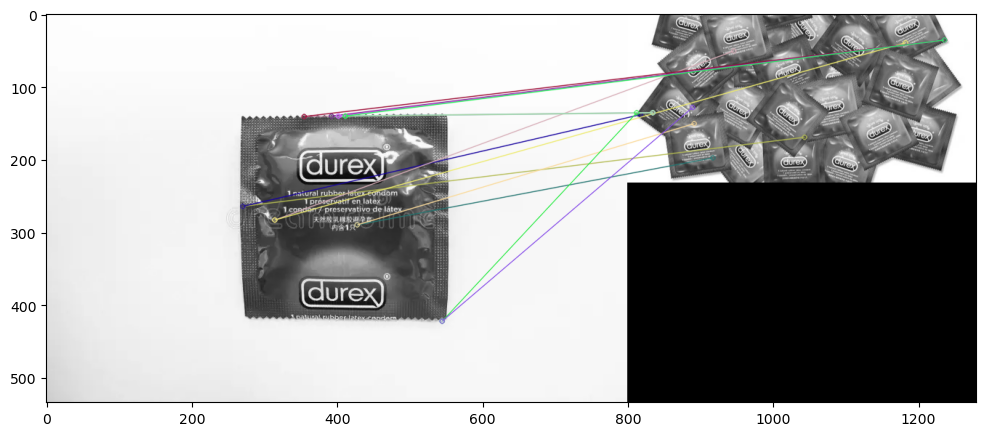

In [126]:
sift_matches = cv2.drawMatchesKnn(object, kp1, durex, kp2, good, None, flags=2)
display(sift_matches)